# Práctica 5: Geomorfología fluvial y morfometría de cuencas


## Ejercicio 1. Consulta bibliográfica

### 1. Breve historia de la geomorfología fluvial
La geomorfología fluvial surge como una rama de la geomorfología que estudia las formas del relieve y los procesos generados por la acción del agua corriente. Entre los autores clásicos destacan **William Morris Davis**, quien propuso el modelo de “ciclo geográfico” a finales del siglo XIX, y **Luna Leopold** y **M.G. Wolman**, quienes, junto con **J.P. Miller**, desarrollaron el enfoque moderno del sistema fluvial en la obra *Fluvial Processes in Geomorphology* (1964).  
En tiempos más recientes, autores como **Gutiérrez Elorza (2008)** y **De Pedraza (1996)** han aportado enfoques integradores, resaltando la relación entre procesos hidrológicos, morfología y dinámica del paisaje. Desde la geografía física, estos aportes permiten interpretar cómo los ríos modelan el territorio y cómo las condiciones climáticas y litológicas condicionan su evolución.

### 2. El sistema fluvial
El sistema fluvial puede entenderse como un conjunto de procesos interrelacionados que transportan agua y sedimentos desde las áreas de captación hasta las zonas de deposición. Comprende tres tramos principales: **curso alto (erosión)**, **curso medio (transporte)** y **curso bajo (sedimentación)**.  
Conceptos básicos como **río, canal, cauce y escorrentía** son esenciales para comprender el comportamiento del sistema. Gutiérrez Elorza destaca la importancia de las variables de pendiente, caudal, carga sólida y energía disponible, que varían en función de los intervalos temporales (desde eventos instantáneos de crecida hasta procesos de evolución geológica).  
En geografía física, este enfoque sistémico permite analizar los impactos del clima y el uso del suelo sobre la dinámica fluvial.

### 3. Fundamentos hidrológicos
Según De Pedraza (1996), los fundamentos hidrológicos del sistema fluvial incluyen la **generación y concentración de la escorrentía**, el **régimen hídrico**, las **crecidas y estiajes**, y el **hidrograma de crecida**.  
La escorrentía superficial se origina cuando la precipitación excede la capacidad de infiltración del suelo, dando lugar al flujo que alimenta los cauces. El régimen hídrico refleja las variaciones del caudal a lo largo del año, condicionadas por el clima y la fisiografía de la cuenca.  
El análisis de hidrogramas es fundamental para identificar el tiempo de concentración y el comportamiento de las crecidas. Desde la geografía física, estos conceptos son esenciales para evaluar riesgos de inundaciones, disponibilidad hídrica y gestión ambiental.

### 4. Morfometría de cuencas y redes de drenaje
La morfometría de cuencas se centra en la **cuantificación de parámetros geométricos, topográficos e hidrológicos** que describen la forma y funcionamiento de una cuenca.  
Entre los parámetros más relevantes se incluyen:
- **Área de cuenca (A):** superficie total que drena hacia un punto de salida.
- **Orden de red (Strahler):** jerarquización de los cauces según su posición dentro del sistema de drenaje.
- **Razón de bifurcación (Rb):** relación entre el número de cauces de un orden y el siguiente.
- **Densidad de drenaje (Dd):** longitud total de los cauces por unidad de superficie.  

Estos parámetros permiten caracterizar la eficiencia de drenaje, la respuesta hidrológica ante eventos de lluvia y la evolución geomorfológica. Desde la geografía física, la morfometría constituye una herramienta fundamental para comparar cuencas, interpretar procesos erosivos y planificar el manejo integral de recursos hídricos.


## Ejercicio 3. Cálculos de morfometría

### 3.1 Densidad de drenaje
\( D_d = \dfrac{L_{\text{total}}}{A} \)  
- \(D_d\): km/km²  
- \(L_{\text{total}}\): longitud total de ríos (km)  
- \(A\): área de la cuenca (km²)

### 3.2 Orden de red (Strahler)
Asignar jerarquía a los cursos:  
- Un **orden 1** es un canal sin tributarios.  
- Cuando confluyen dos canales del **mismo orden n**, aguas abajo el orden aumenta a **n+1**.  
- Si confluyen órdenes distintos, el orden aguas abajo es el **mayor** de los dos.

### 3.3 Razón de bifurcación (Horton, 1945)
\( R_b(n \to n+1) = \dfrac{N_n}{N_{n+1}} \)  
- \(N_n\): número de ríos de orden \(n\).  
También puede estimarse una **\(R_b\) media** y una \(R_b\) por **regresión** de la ley de Horton:  
\(\log_{10} N = a - b\,\text{orden}\) → \( R_b \approx 10^{\,b}\).


In [1]:
# --- ENTRADAS BÁSICAS ---
A_km2 = 18.0          # área de la cuenca en km²  ← reemplaza
L_total_km = 27.0    # longitud total de la red en km ← reemplaza

# Conteo de ríos por orden (Strahler). Ejemplo: {orden: cantidad}
N = {
    1: 15,   # reemplaza con tus conteos
    2: 7,
    3: 3,
    4: 1
}


In [2]:
#Densidad de drenaje
Dd = L_total_km / A_km2
Dd


1.5

In [3]:
#Razones de bifurcación y promedio
import numpy as np
from math import log10

# Razones Rb entre órdenes consecutivos
ordenes = sorted(N.keys())
Rb_pares = {}

for i in range(len(ordenes)-1):
    n = ordenes[i]
    np1 = ordenes[i+1]
    if N[np1] == 0:
        Rb_pares[(n, np1)] = np.nan
    else:
        Rb_pares[(n, np1)] = N[n] / N[np1]

Rb_pares, np.nanmean(list(Rb_pares.values()))


({(1, 2): 2.142857142857143, (2, 3): 2.3333333333333335, (3, 4): 3.0},
 np.float64(2.492063492063492))

{'pendiente(m)': np.float64(-0.38962505624616384), 'intercepto(a)': np.float64(1.5986402790628091), 'b': np.float64(0.38962505624616384), 'Rb_reg': np.float64(2.452590582091951)}


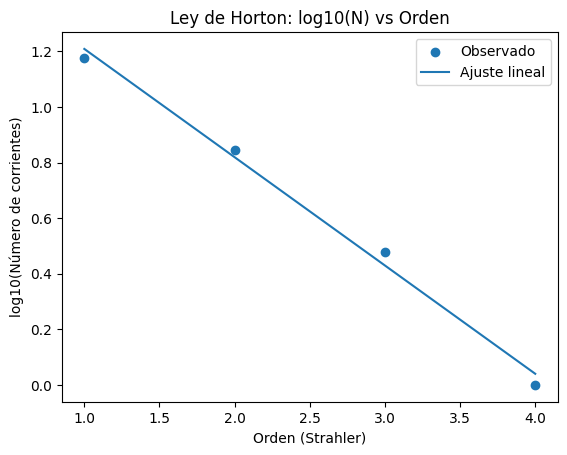

In [4]:
#Estimación por regresión de Horton y gráfica
import numpy as np
import matplotlib.pyplot as plt

# Datos para la regresión: orden vs log10(N)
x = np.array(ordenes, dtype=float)
y = np.log10(np.array([N[o] for o in ordenes], dtype=float))

# Ajuste lineal: y = a + m*x  (en notación Horton: y = a - b*orden)
m, a = np.polyfit(x, y, 1)  # m = pendiente, a = intercepto

b = -m               # en Horton, b = -pendiente
Rb_reg = 10**b       # Rb ~ 10^b

print({"pendiente(m)": m, "intercepto(a)": a, "b": b, "Rb_reg": Rb_reg})

# Gráfica Horton (log10 N vs Orden)
plt.figure()
plt.scatter(x, y, label="Observado")
y_hat = a + m*x
plt.plot(x, y_hat, label="Ajuste lineal")
plt.xlabel("Orden (Strahler)")
plt.ylabel("log10(Número de corrientes)")
plt.title("Ley de Horton: log10(N) vs Orden")
plt.legend()
plt.show()


### Resultados del análisis morfométrico de la red fluvial

**Densidad de drenaje (Dd):**  
La cuenca presenta una densidad de drenaje de **1.50 km/km²**, lo que indica una **eficiencia media de drenaje**. Este valor sugiere que el área posee una red fluvial moderadamente desarrollada, con buena conectividad de cauces pero sin alcanzar una disección intensa. En términos geomorfológicos, una densidad intermedia suele asociarse a pendientes medias, suelos de permeabilidad moderada y una cobertura vegetal parcialmente conservada.

**Orden de red (Strahler) y jerarquía fluvial:**  
El **orden máximo** identificado fue **Ω = 4**. La distribución jerárquica de los cauces fue la siguiente:  
- Orden 1 → 15 ríos  
- Orden 2 → 7 ríos  
- Orden 3 → 3 ríos  
- Orden 4 → 1 río  

Esta organización refleja una red de drenaje bien estructurada, donde predominan los cauces de primer orden, típicos de cuencas pequeñas a medianas y de relieves con ramificación moderada.

**Razón de bifurcación (Rb):**  
Las razones de bifurcación calculadas según Horton (1945) fueron:  
- \( R_b(1\to2) = 2.14 \)  
- \( R_b(2\to3) = 2.33 \)  
- \( R_b(3\to4) = 3.00 \)  

El **promedio general** fue de **\( \overline{R_b} = 2.49 \)**, y el cálculo por **regresión lineal de Horton** arrojó un valor de **\( R_b^{reg} = 2.45 \)**, con una pendiente de **m = −0.39** en la relación log10(N)–orden.  
La similitud entre el valor promedio y el estimado por regresión sugiere una **coherencia estructural en la red fluvial**, indicando que la cuenca presenta un patrón ramificado estable y una evolución fluvial relativamente equilibrada.

**Gráfica de Horton:**  
La figura siguiente muestra la relación logarítmica entre el número de corrientes y el orden (Strahler), donde se observa una tendencia lineal negativa que respalda la ley de jerarquización de Horton.

![Ley de Horton: log10(N) vs Orden](d2cf1f55-959e-44fa-87e7-7a6166e18a14.png)


## Ejercicio 4. Análisis crítico

### 4.1 Interpretación

**Influencia del clima en la morfometría de la cuenca**  
El clima constituye uno de los factores más determinantes en la morfometría de las cuencas hidrográficas. En la cuenca de San Cristóbal, el régimen de lluvias tropicales, caracterizado por precipitaciones abundantes y estacionales, influye directamente en la generación de escorrentía y en la densidad de drenaje observada (1.50 km/km²). De acuerdo con Gutiérrez Elorza (2008), en climas húmedos las cuencas tienden a presentar una red fluvial más densa y ramificada debido a la acción erosiva constante del agua corriente. Esto explica la presencia de múltiples cauces de primer orden y una estructura bien jerarquizada, lo que sugiere una cuenca activa en términos de modelado fluvial.

**Impacto de la litología en la estructura de los sistemas fluviales**  
La litología controla en gran medida la forma y la conectividad de las redes de drenaje. Según Pedraza (1996), los materiales más resistentes (rocas ígneas o metamórficas) favorecen la formación de cauces estrechos, con pendientes pronunciadas y menor densidad de drenaje, mientras que los materiales más blandos o sedimentarios permiten una mayor disección del relieve. En la cuenca de San Cristóbal, compuesta por formaciones sedimentarias e intrusiones ígneas dispersas, la morfometría sugiere una combinación de sectores resistentes y permeables. Esta diversidad litológica condiciona la forma de la red fluvial y su capacidad de infiltración, equilibrando los procesos de erosión y sedimentación.

**Efectos de las actividades humanas sobre los procesos fluviales**  
Las actividades humanas tienen una incidencia creciente en la dinámica fluvial de la región. La expansión urbana, la deforestación y el uso agrícola intensivo alteran los patrones de escorrentía y aumentan la sedimentación en los cauces. Según Gutiérrez Elorza (2008), la pérdida de cobertura vegetal reduce la capacidad del suelo para retener agua, incrementando los picos de crecida y acelerando los procesos erosivos. En el caso de San Cristóbal, el crecimiento de la ciudad y los cambios en el uso del suelo han modificado el equilibrio natural de la cuenca, reduciendo su capacidad de regulación hídrica y aumentando la vulnerabilidad ante inundaciones locales.

---

### 4.2 Influencia de Factores Externos

El desarrollo geomorfológico de la cuenca de San Cristóbal no solo depende de factores climáticos y litológicos, sino también de los **procesos tectónicos** y del **marco estructural regional**. De acuerdo con los principios señalados por Pedraza (1996), las deformaciones tectónicas controlan la orientación de los cauces principales, así como los cambios en la pendiente longitudinal. La existencia de fallas y fracturas en la zona Sur de la Cordillera Central influye en la dirección de los drenajes y en la configuración de los valles.  

En términos climáticos, la recurrencia de lluvias intensas y eventos extremos (tormentas tropicales) acelera la evolución del relieve, promoviendo la incisión fluvial y el transporte de sedimentos. Este comportamiento, descrito por Gutiérrez Elorza (2008) como parte del “equilibrio dinámico” de los sistemas fluviales, refleja una cuenca en ajuste continuo frente a los forzamientos externos.  

En conjunto, la cuenca de San Cristóbal evidencia una interacción compleja entre factores naturales (clima, litología, tectónica) y antrópicos, que determinan su morfología, su red de drenaje y su grado actual de estabilidad geomorfológica.
